In [1]:
# Jun 3rd 2022
# Author: Jose Bastias
# Description: Python code to read raw data from the Mary Wildman dataset. 
# Actions: 
#          1.- Read the original csv/excel files - time series, head and atm pressure
#          2.- Transform the time data into readable format using only pandas automatic time recog algorithm
#          3.- Clean outliers with "hampel"
#          4.- Plot and save

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel
import pickle

plt.style.use('ggplot')
myColor  = ("#E3072A","#0A8974","#5FAECC","#E49C23","#E27520") # Darjeeling Color map

Load baro data and plot. You may notice that the data does not covers the entire range of head measurements

In [6]:
path = 'Baro_data/'

file = 'Wildman_Cashew_Baro.xlsx'

df = pd.read_excel(path + file, skiprows=66)

time_serie_r = df['Date and Time'].values
baro_r = df['Pressure (kPa)'].values

ts_out_baro = hampel(pd.Series(baro_r), window_size=20, n=8)

baro = 200 - np.delete(baro_r, ts_out_baro)
time_serie = np.delete(time_serie_r, ts_out_baro)
baro_out = 200 - np.take(baro_r, ts_out_baro)
time_out = np.take(time_serie_r, ts_out_baro)
  
# Save results

df_baro = pd.DataFrame(zip(time_serie, baro), columns=['date', 'pressure[kPa]'])
df_out = pd.DataFrame(zip(time_out, baro_out), columns=['date', 'pressure[kPa]'])

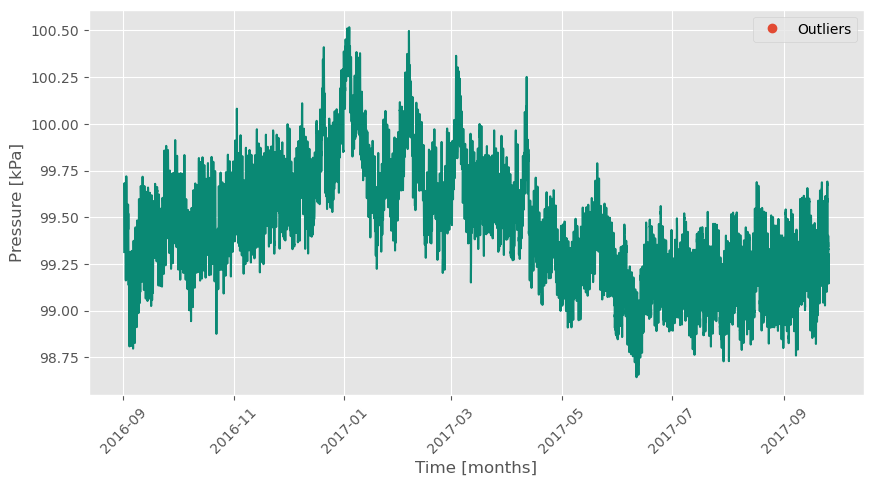

In [5]:
fig, ax = plt.subplots(nrows= 1,ncols=1,figsize=(10.0,5.0), sharex = True)

ax.plot(df_baro['date'],df_baro['pressure[kPa]'], color=myColor[1])
ax.plot(df_out['date'], df_out['pressure[kPa]'], 'o',label = 'Outliers')

ax.set_ylabel('Pressure [kPa]')
ax.set_xlabel('Time [months]')

ax.tick_params(axis='x', labelrotation=45)
ax.legend()

In [7]:
# Save results
path = 'Results/pkl_files/'

with open(path + 'cleaned_data_baro.pkl', 'wb') as f:
    pickle.dump(df_baro, f)